# 딥러닝 구조 연습2

## 라이브러리 로드

In [1]:
import pandas as pd
import tensorflow as tf

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 데이터 로드

In [3]:
df = pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 데이터 준비

In [4]:
X_train=df.drop(['Outcome'],axis=1)
y_train = df['Outcome']

In [5]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [6]:
X_train.ndim

2

In [7]:
X_train.shape

(768, 8)

## 딥러닝 구성하기

http://alexlenail.me/NN-SVG/index.html

In [9]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_shape=(8,),activation='relu')) # 분류
model.add(Dense(1, activation='sigmoid')) #모델을 만드는 목적: 이진 분류

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                108       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## 딥러닝 설정하기

In [11]:
# 모델을 컴파일합니다.
# 이진분류 loss: binary_crossentropy

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='Accuracy')

## 딥러닝 훈련하기

In [12]:
X_train.shape

(768, 8)

In [14]:
# 모델을 실행합니다.
epoch_hist = model.fit(X_train, y_train,epochs=200)

Epoch 1/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5181 - Accuracy: 0.7552
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5223 - Accuracy: 0.7435
Epoch 3/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5543 - Accuracy: 0.7474
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5829 - Accuracy: 0.7266
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5278 - Accuracy: 0.7305
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 0.5181 - Accuracy: 0.7630
Epoch 7/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5132 - Accuracy: 0.7409
Epoch 8/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5359 - Accuracy: 0.7266
Epoch 9/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5205 - Accuracy: 0.7383
Epoch 10/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5449 - Accuracy: 0.7331
Epoch 11/

## 평가하기

In [15]:
# 결과를 출력합니다.
model.evaluate(X_train, y_train)

24/24 [==============================] - 0s 870us/step - loss: 0.4646 - Accuracy: 0.7826


[0.46461620926856995, 0.7825520634651184]

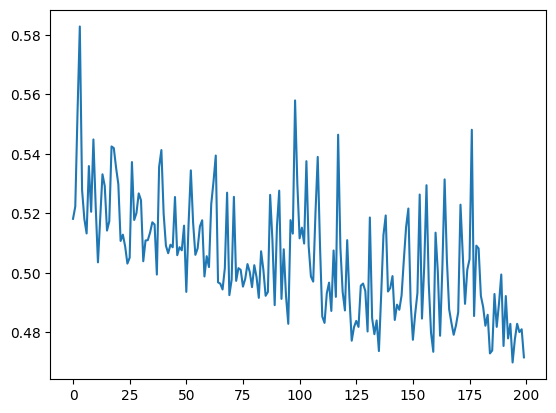

In [16]:
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'])

## 전체 코드

In [17]:
import pandas as pd
import tensorflow as tf

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('./data/diabetes.csv')
df.head()

X_train=df.drop(['Outcome'],axis=1)
y_train = df['Outcome']

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(units=12,input_shape=(8,),activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# 모델을 컴파일합니다.
# 이진분류 loss: binary_crossentropy

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='Accuracy')

# 모델을 실행합니다.
epoch_hist = model.fit(X_train, y_train,epochs=200)
model.evaluate(X_train,y_train)

Epoch 1/200
24/24 [==============================] - 0s 1ms/step - loss: 6.6800 - Accuracy: 0.3763
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 2.2769 - Accuracy: 0.5690
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 1.2952 - Accuracy: 0.5651
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 0.9498 - Accuracy: 0.6628
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 0.8436 - Accuracy: 0.6797
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 0.6980 - Accuracy: 0.7070
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6550 - Accuracy: 0.6849
Epoch 8/200
24/24 [==============================] - 0s 1ms/step - loss: 0.6378 - Accuracy: 0.6953
Epoch 9/200
24/24 [==============================] - 0s 1ms/step - loss: 0.6192 - Accuracy: 0.6966
Epoch 10/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6033 - Accuracy: 0.7070
Epoch 11/

[0.4632158577442169, 0.78125]

## 실험

아래의 파라미터를 조정해보며 네트워크의 구성과 성능을 살펴봅시다. 
* Dense층의 유닛개수를 조정해 봅시다. 
* Dense층을 더 넣어 봅시다. 
* epoch수와 batch_size를 조정해 봅시다.